In [1]:
# https://huggingface.co/mistralai/Mixtral-8x7B-Instruct-v0.1

In [3]:

def gcd(u, v):
    if v != 0:
        (u, v) = (v, u % v)
    return abs(u)

gcd(144, 12)

12

In [8]:
# demo NN
import numpy as np

x0 = np.array([[1], [0]])
w0 = np.array([[0, 1]])

y = x0 * w0

y

array([[0, 1],
       [0, 0]])

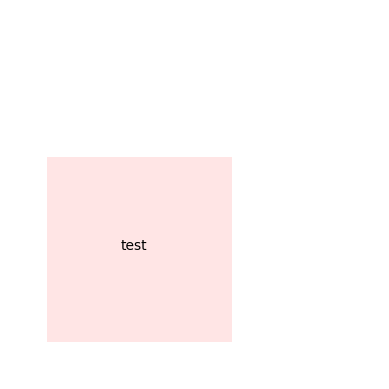

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x=y=0.1
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
patch= ax1.add_patch(patches.Rectangle((x, y), 0.5, 0.5, alpha=0.1,facecolor='red',label='Label'))

centerx = x + 0.5/2 - 0.05
centery = y + 0.5/2

plt.axis('off')
plt.text(centerx, centery,'test')
plt.show()

## Simple NN Demo


In [21]:
# weight --- w1 ---- h1
#        \ /-----w2-/  \ w5 - output:
#        / \-----w3-\  / w6 - gender
# height --- w4 ---- h2

In [138]:
# https://victorzhou.com/blog/intro-to-neural-networks/
import numpy as np
import time

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.15
    epochs = 200 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 20 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# training dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

start = time.time()
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)
end = time.time()
print(f"execution time: {(end-start) * 10**3} ms")

Epoch 0 loss: 0.147
Epoch 20 loss: 0.047
Epoch 40 loss: 0.028
Epoch 60 loss: 0.020
Epoch 80 loss: 0.015
Epoch 100 loss: 0.012
Epoch 120 loss: 0.010
Epoch 140 loss: 0.008
Epoch 160 loss: 0.007
Epoch 180 loss: 0.006
execution time: 13.095617294311523 ms


In [139]:
# validation
# test data
testdata = np.array([
  [-3, -1],  # Rachel
  [21, 5],   # John
])

test_truth = np.array([
  1, # Rachel
  0, # John
])

test_preds = np.apply_along_axis(network.feedforward, 1, testdata)
loss = mse_loss(test_truth, test_preds)
print(f"validation loss: {loss}")

validation loss: 0.0056283013651685886


In [140]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.936
Frank: 0.075


In [28]:
# how to prevent overfitting: https://programming-review.com/machine-learning/overfitting

In [142]:
import numpy as np
import time

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred[:,0,0]) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # Weights
    self.w0 = np.random.randn(2, 2)
    self.w1 = np.random.randn(2, 1)

    # Biases
    self.b0 = np.random.randn(1, 2)
    self.b1 = np.random.randn(1, 1)

  def feedforward(self, x):
      # x is a numpy array with 2 elements#
      h0 = sigmoid(np.dot(x, self.w0) + self.b0)
      o0 = sigmoid(np.dot(h0, self.w1) + self.b1)
      return o0

  def train(self, data, all_y_trues):
      '''
      - data is a (n x 2) numpy array, n = # of samples in the dataset.
      - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
      '''
      learn_rate = 0.15
      epochs = 200 # number of times to loop through the entire dataset
      
      for epoch in range(epochs):
          for x, y_true in zip(data, all_y_trues):
              # --- Do a feedforward (we'll need these values later)
              y_pred = self.feedforward(x)

              # backpropagation
              d_L_d_ypred = -2 * (y_true - y_pred)  # (1,2)
              h0pre = np.dot(x, self.w0) + self.b0
              h0 = sigmoid(h0pre)
              dL_b1 = d_L_d_ypred * deriv_sigmoid(np.dot(h0, self.w1) + self.b1)
              dL_w1 = dL_b1 * h0.T
              dL_b0 = dL_b1 * np.dot(deriv_sigmoid(h0pre), self.w1)  # (1,2)
              dL_w0 = dL_b0 * x
              
              # --- Update weights and biases
              self.w1 -= learn_rate * dL_w1
              self.b1 -= learn_rate * dL_b1
              self.w0 -= learn_rate * dL_w0
              self.b0 -= learn_rate * dL_b0
          # --- Calculate total loss at the end of each epoch
          if epoch % 20 == 0:
              y_preds = np.apply_along_axis(self.feedforward, 1, data)
              loss = mse_loss(all_y_trues, y_preds)
              print("Epoch %d loss: %.3f" % (epoch, loss))

# training dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

start = time.time()
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)
end = time.time()
print(f"execution time: {(end-start) * 10**3} ms")

Epoch 0 loss: 0.293
Epoch 20 loss: 0.161
Epoch 40 loss: 0.082
Epoch 60 loss: 0.048
Epoch 80 loss: 0.033
Epoch 100 loss: 0.024
Epoch 120 loss: 0.019
Epoch 140 loss: 0.015
Epoch 160 loss: 0.013
Epoch 180 loss: 0.011
execution time: 34.03043746948242 ms


In [143]:
# Make some predictions
emily = np.array([-7, -3])
frank = np.array([20, 2]) 
print(f"Emily: {network.feedforward(emily)}")
print(f"Frank: {network.feedforward(frank)}")

Emily: [[0.89358812]]
Frank: [[0.08016857]]
